In [1]:
import os

import geopandas as gpd
import pandas as pd
import numpy as np
import momepy as mm
import networkx as nx

from sqlalchemy import create_engine

import matplotlib.pyplot as plt

user = os.environ.get('DB_USERNAME')
pwd = os.environ.get('DB_PASSWORD')
host = os.environ.get('DB_HOSTNAME')
port = os.environ.get('DB_PORT')

url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
engine = create_engine(url)

In [14]:
sql = '''SELECT table_name
  FROM information_schema.tables
 WHERE table_schema='public'
   AND table_type='BASE TABLE';'''

tables = pd.read_sql(sql, engine).table_name

In [20]:
print(tables)

0                       spatial_ref_sys
1                             opennames
2                            openrivers
3                             openroads
4                          boundaryline
5                          openmaplocal
6                        opengreenspace
7                              openuprn
8                              opentoid
9     boundary_line_ceremonial_counties
10      boundary_line_historic_counties
11                       community_ward
12                       country_region
13                               county
14            county_electoral_division
15             district_borough_unitary
16        district_borough_unitary_ward
17                       english_region
18                 greater_london_const
19                           high_water
20             historic_european_region
21                               parish
22            polling_districts_england
23             scotland_and_wales_const
24            scotland_and_wales_region


In [7]:
def pgselect(table, buffer=1000, x=338286, y=392077):
    user = os.environ.get('DB_USERNAME')
    pwd = os.environ.get('DB_PASSWORD')
    host = os.environ.get('DB_HOSTNAME')
    port = os.environ.get('DB_PORT')

    url = f"postgres+psycopg2://{user}:{pwd}@{host}:{port}/geodemo"
    engine = create_engine(url)
    sql = f'SELECT * FROM {table} WHERE ST_DWithin(geometry, ST_SetSRID(ST_Point({x}, {y}), 27700), {buffer})'
    return gpd.read_postgis(sql, engine, geom_col='geometry')

In [39]:
pgselect('opennames')

,ID,NAMES_URI,NAME1,NAME1_LANG,NAME2,NAME2_LANG,TYPE,LOCAL_TYPE,MOST_DETAIL_VIEW_RES,LEAST_DETAIL_VIEW_RES,...,COUNTY_UNITARY_URI,COUNTY_UNITARY_TYPE,REGION,REGION_URI,COUNTRY,COUNTRY_URI,RELATED_SPATIAL_OBJECT,SAME_AS_DBPEDIA,SAME_AS_GEONAMES,geometry
0,osgb4000000074561357,http://data.ordnancesurvey.co.uk/id/4000000074...,Stanley,None,None,None,populatedPlace,Suburban Area,8000,25000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (338944.000 391462.000)
1,osgb4000000074305591,http://data.ordnancesurvey.co.uk/id/4000000074...,Tuebrook,None,None,None,populatedPlace,Suburban Area,11000,25000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (338399.000 392522.000)
2,L138DN,http://data.ordnancesurvey.co.uk/id/postcodeun...,L13 8DN,None,None,None,other,Postcode,3500,18000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (338142.000 393022.000)
3,L137HN,http://data.ordnancesurvey.co.uk/id/postcodeun...,L13 7HN,None,None,None,other,Postcode,3500,18000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (338445.000 391973.000)
4,L64BY,http://data.ordnancesurvey.co.uk/id/postcodeun...,L6 4BY,None,None,None,other,Postcode,3500,18000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (337584.000 392255.000)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,osgb4000000013391250,http://data.ordnancesurvey.co.uk/id/4000000013...,June Road,None,None,None,transportNetwork,Named Road,1000,20000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (337621.000 392367.000)
491,osgb4000000013376081,http://data.ordnancesurvey.co.uk/id/4000000013...,Deansburn Road,None,None,None,transportNetwork,Named Road,1000,20000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (338250.000 392640.000)
492,osgb4000000073306773,http://data.ordnancesurvey.co.uk/id/4000000073...,St Margaret's Anfield Church of England Primar...,None,None,None,other,Primary Education,1000,50000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (337325.000 392323.000)
493,osgb4000000013356119,http://data.ordnancesurvey.co.uk/id/4000000013...,Forfar Road,None,None,None,transportNetwork,Named Road,1000,20000,...,None,None,North West,http://data.ordnancesurvey.co.uk/id/7000000000...,England,http://data.ordnancesurvey.co.uk/id/country/en...,None,None,None,POINT (337982.000 392997.000)


In [29]:
gdf = gpd.read_postgis('SELECT * FROM westminster_const', engine, geom_col='geometry')

In [30]:
from mapclassify import greedy

In [32]:
gdf['color'] = greedy(gdf)

<AxesSubplot:>

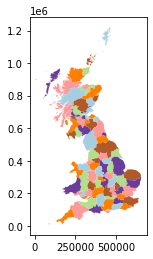

In [38]:
gdf.plot('color', cmap='Paired')

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
<ipython-input-23-51be14e67dce>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(16,16))


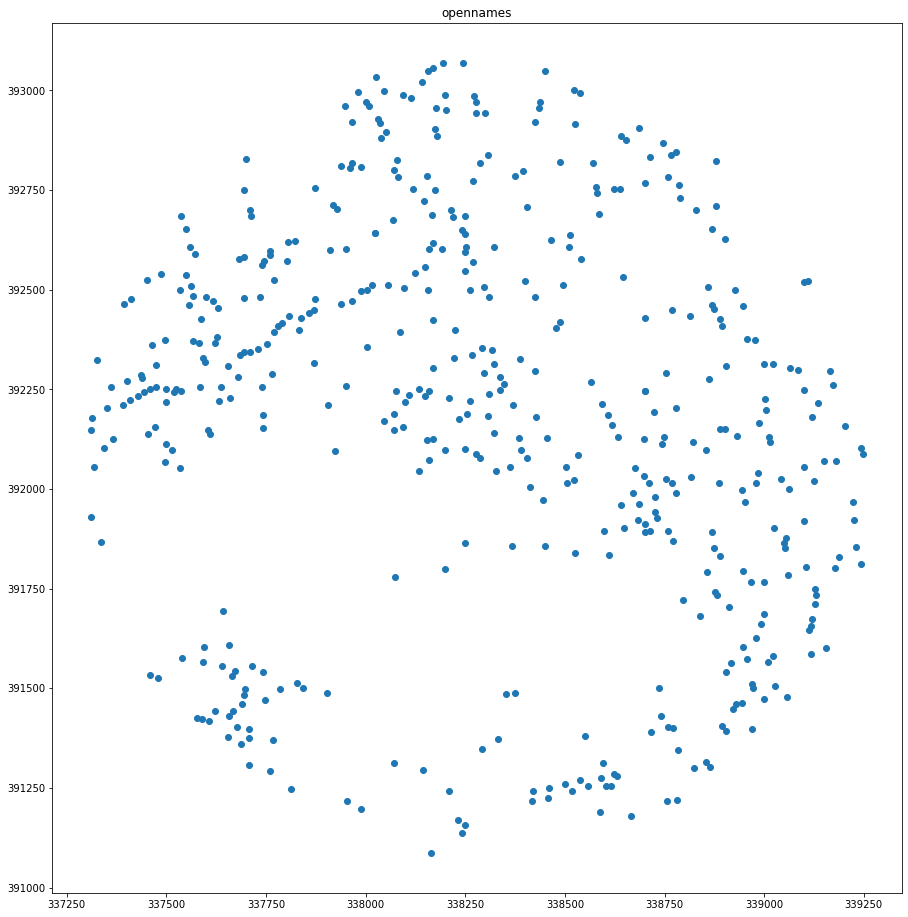

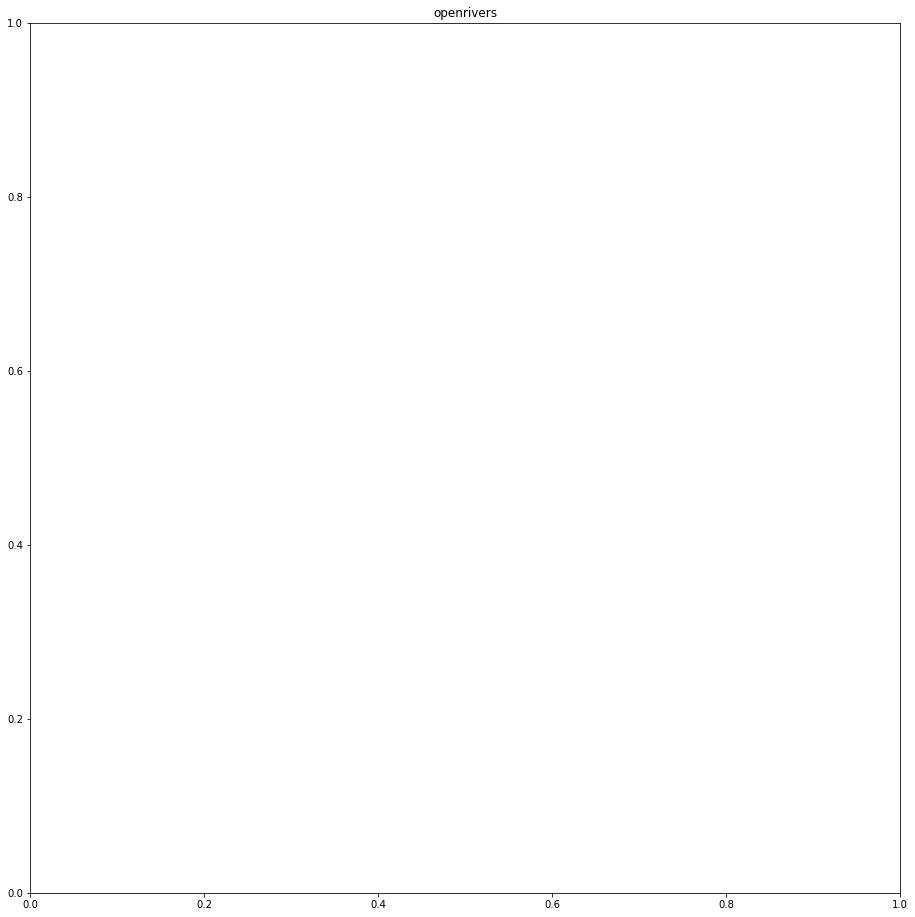

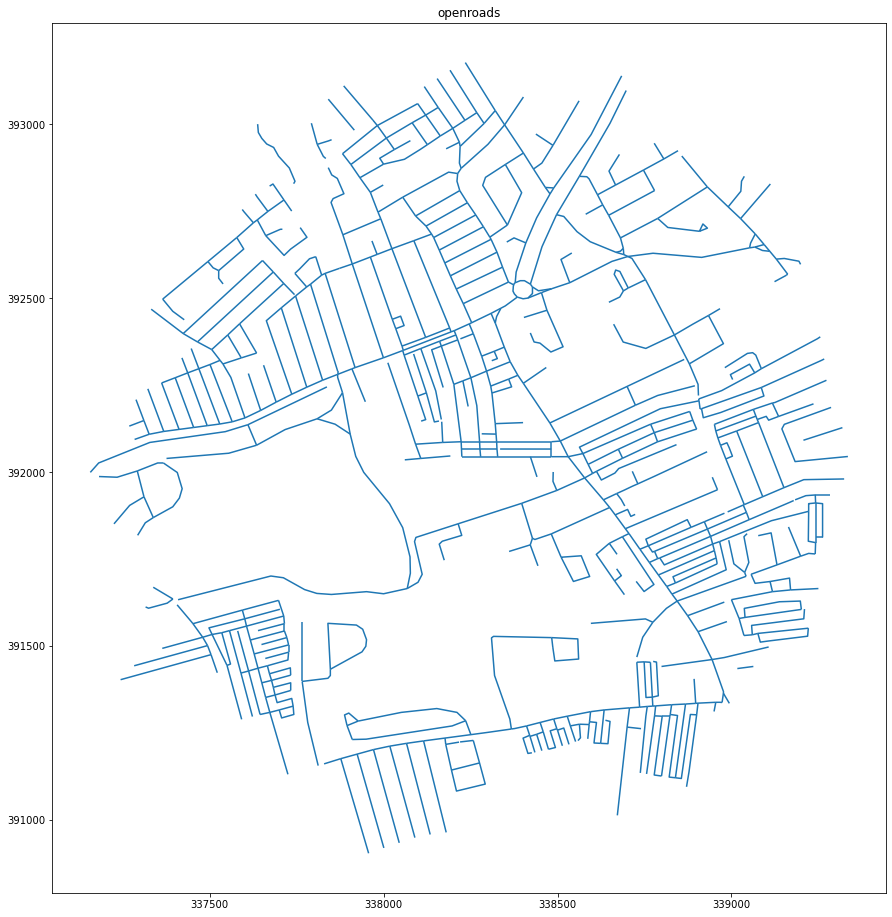

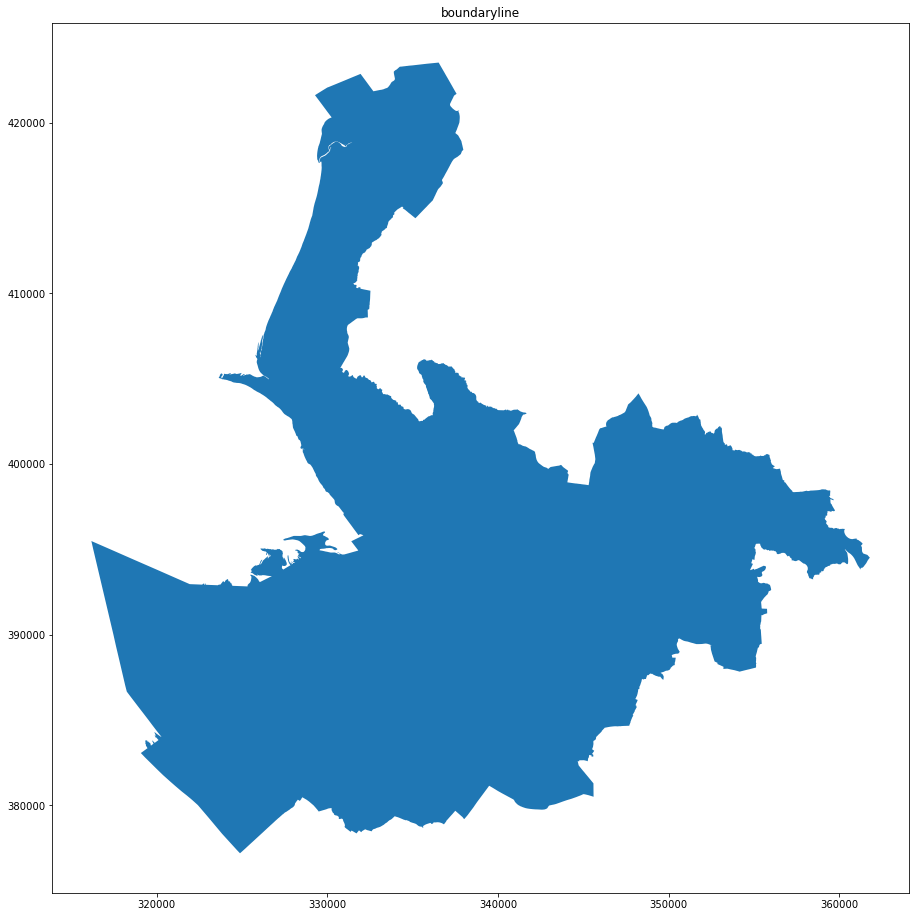

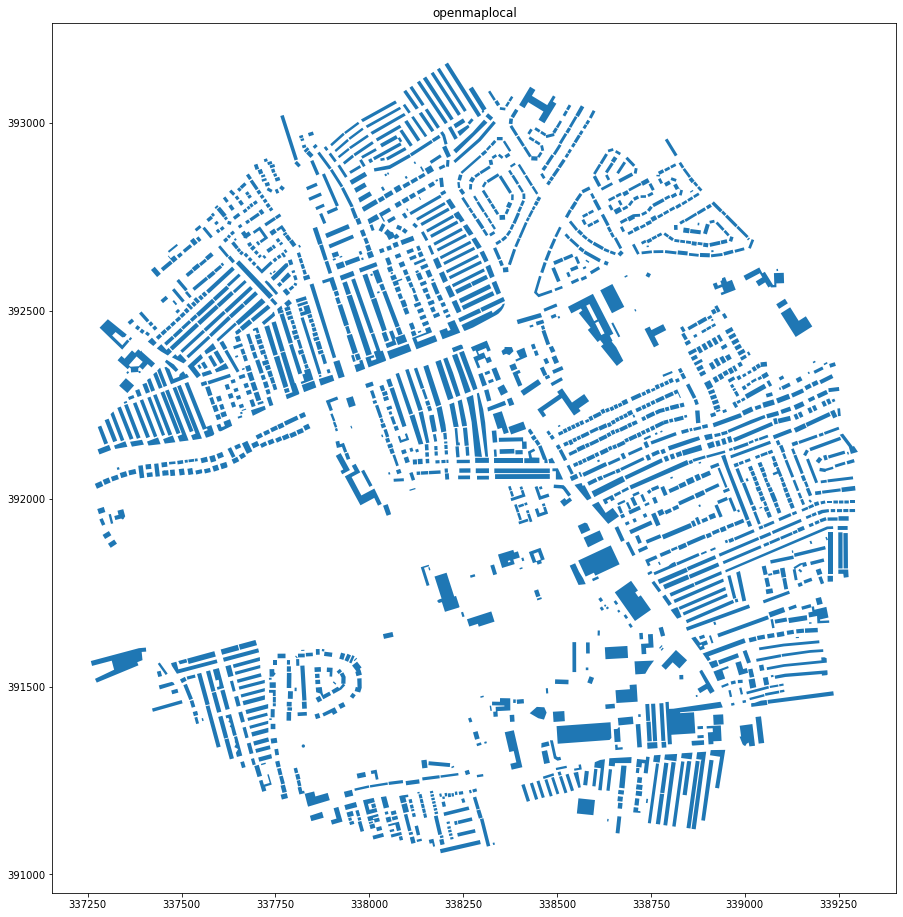

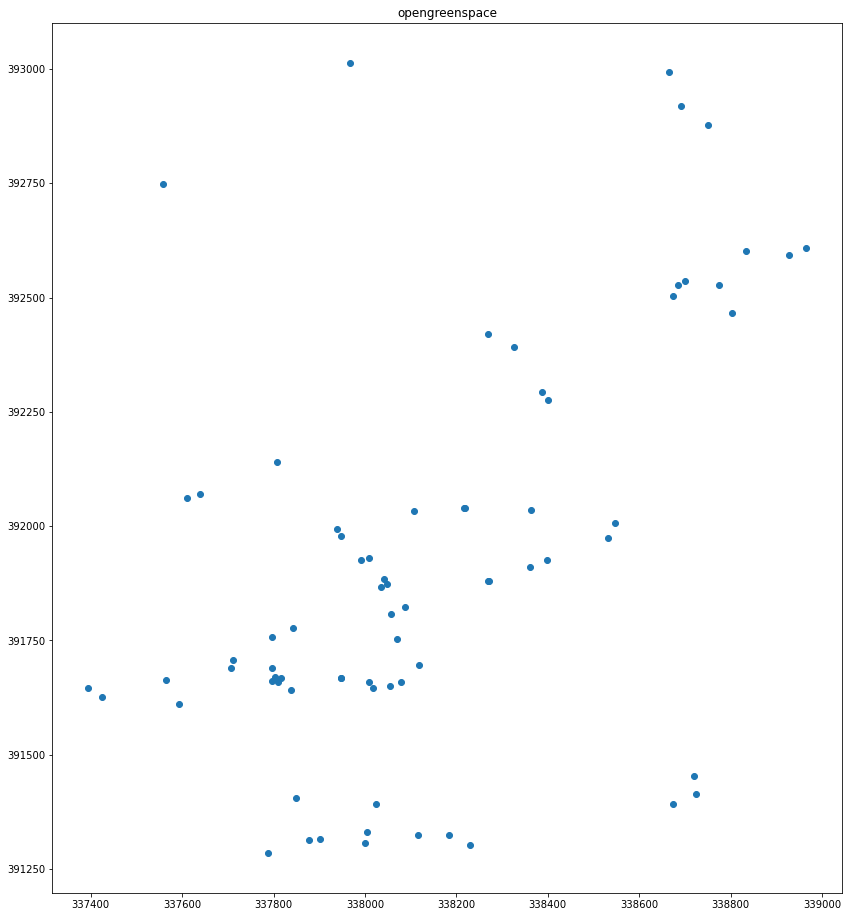

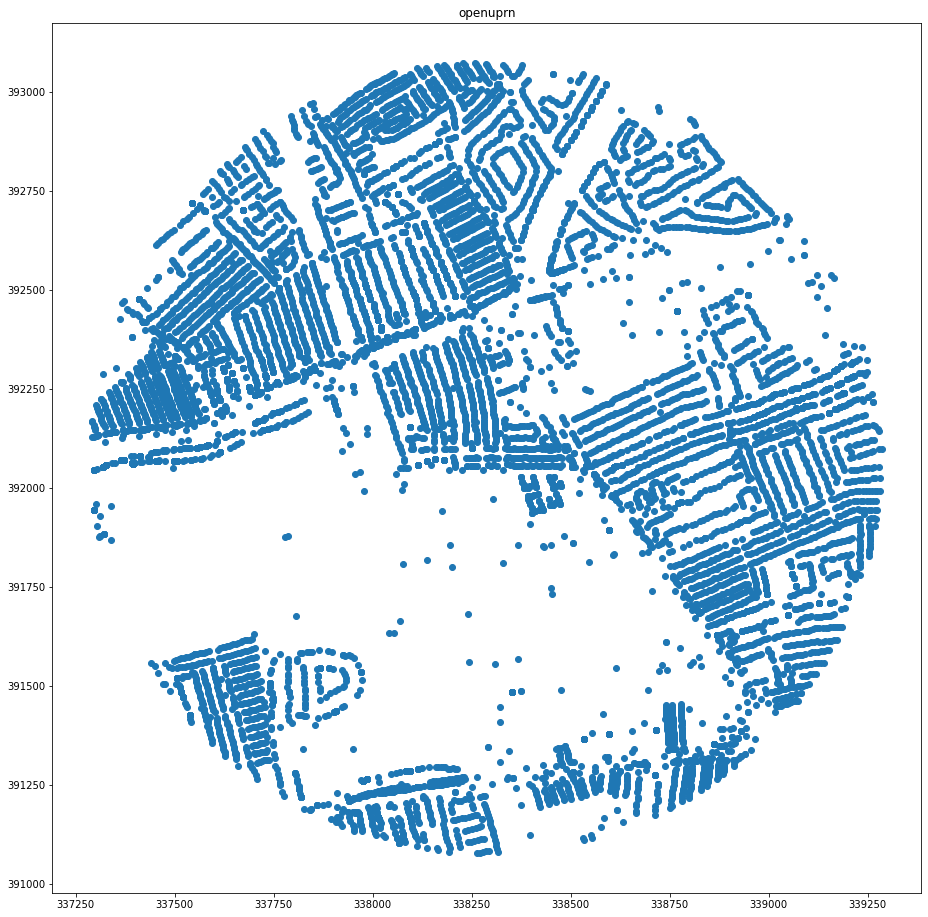

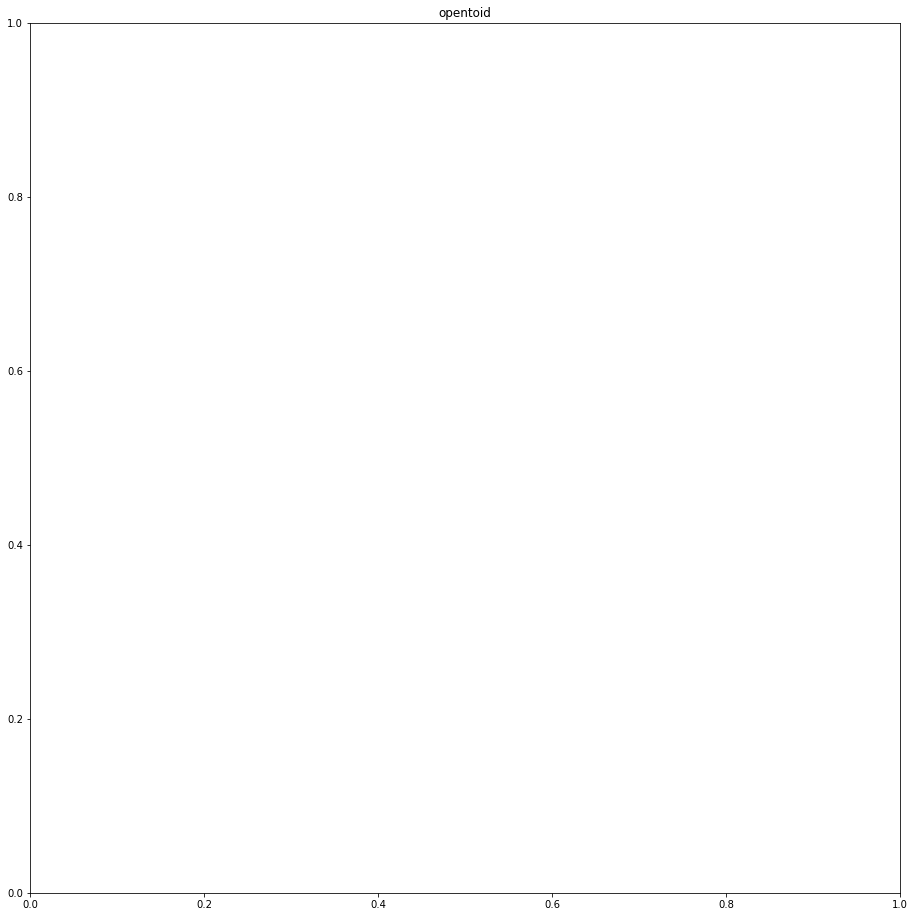

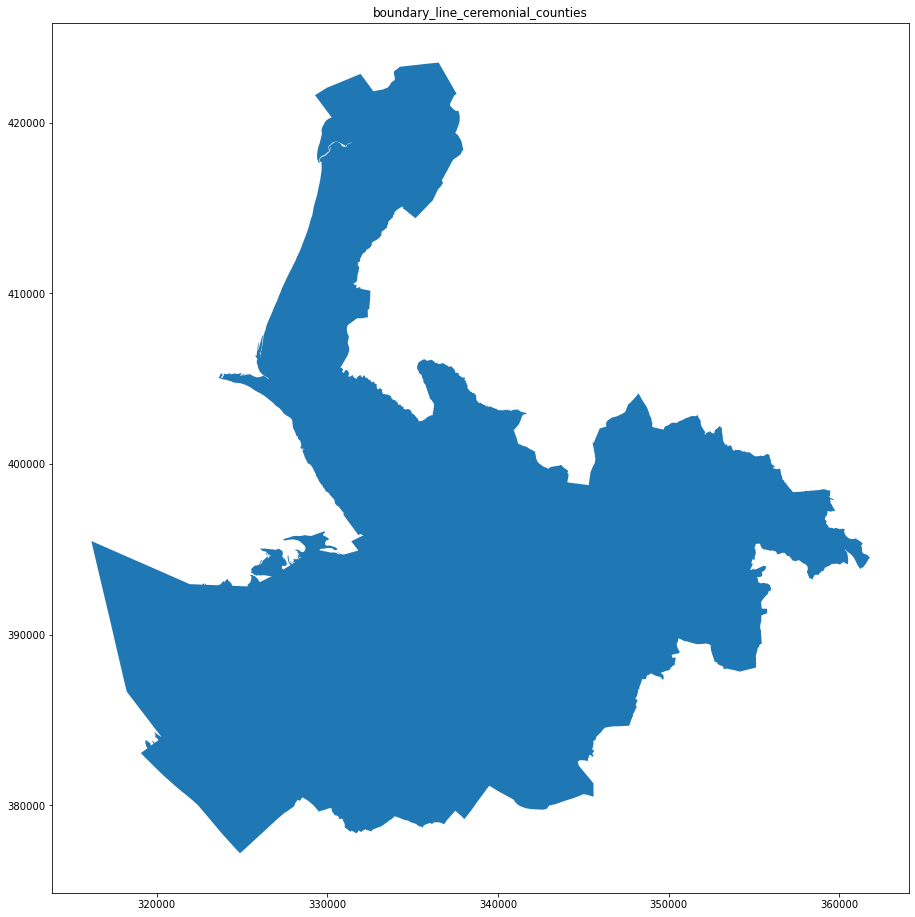

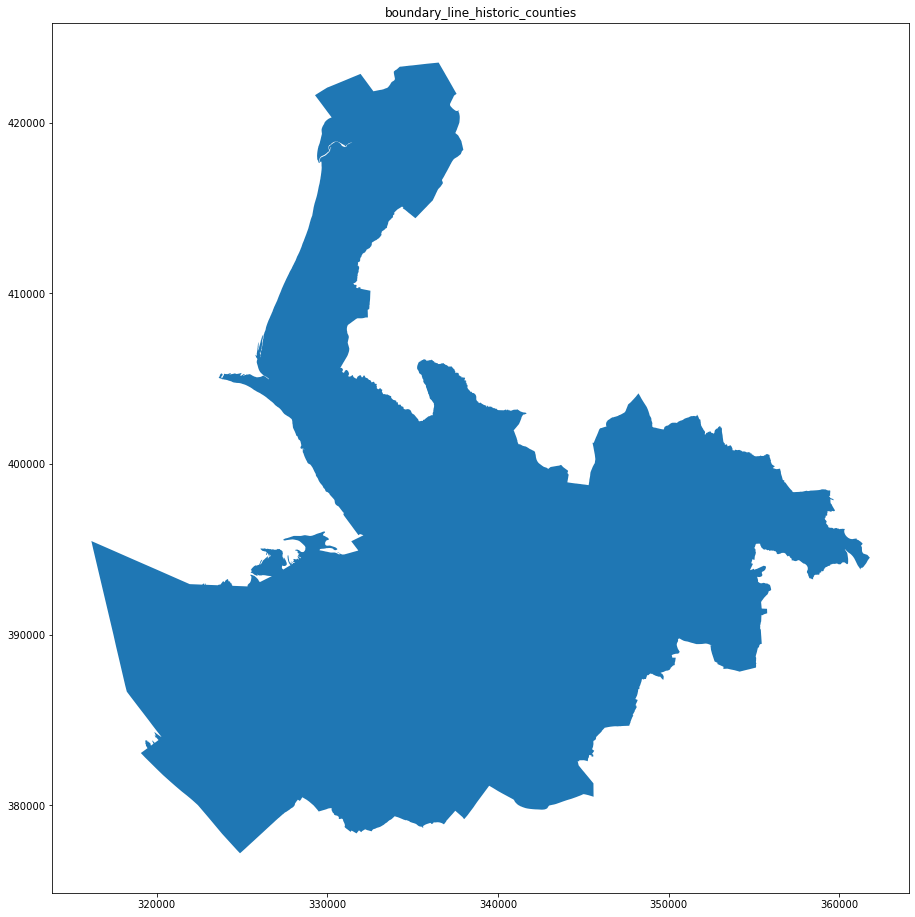

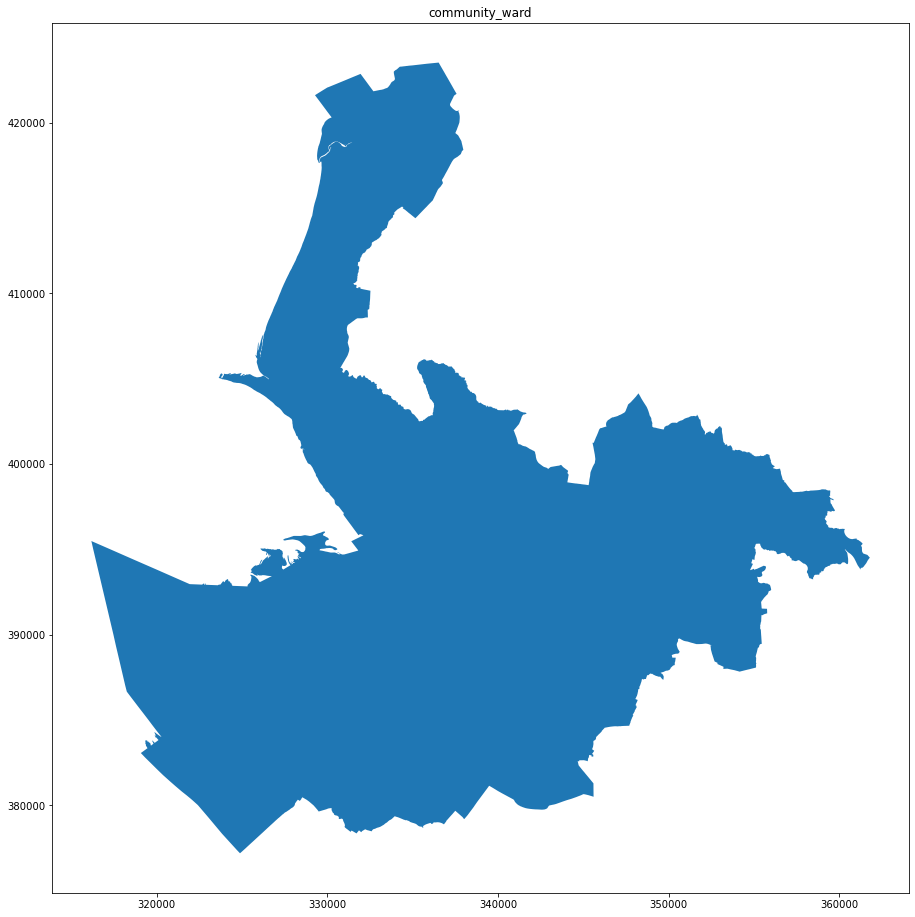

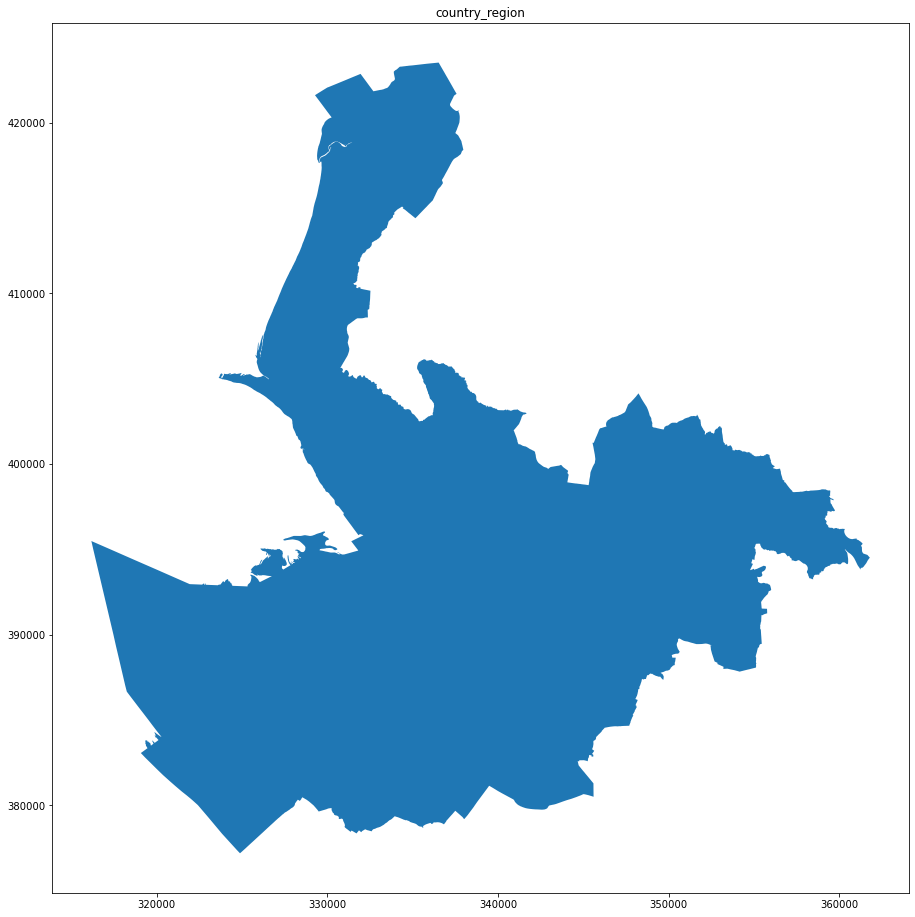

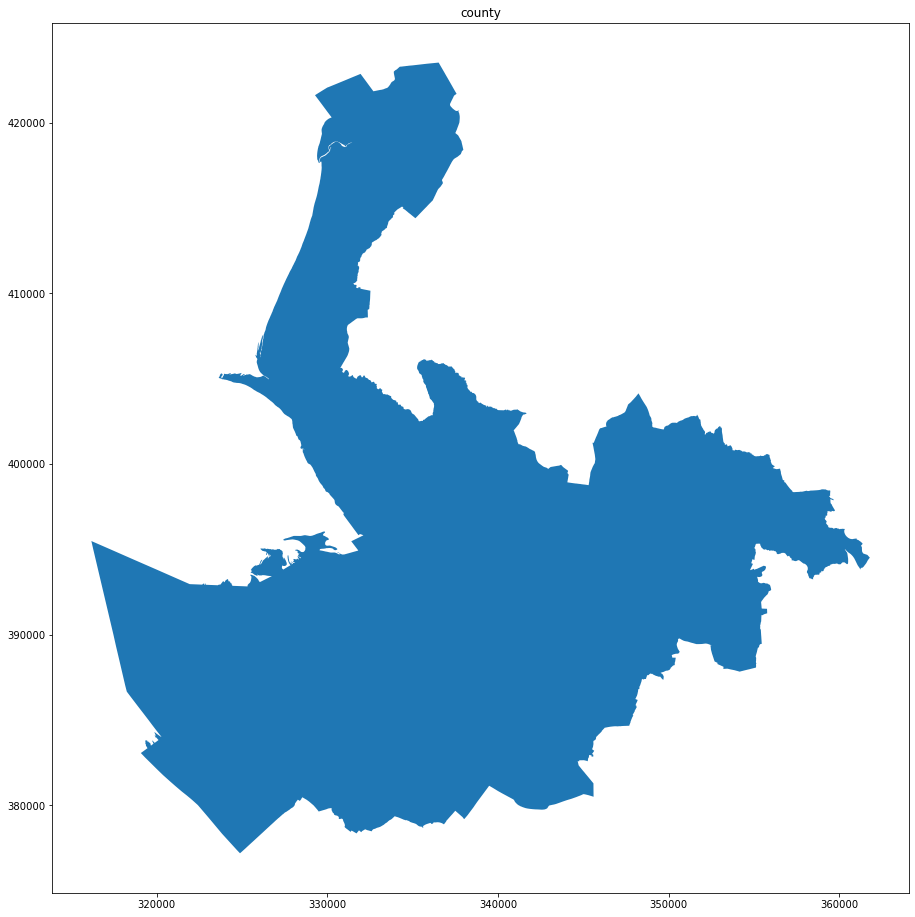

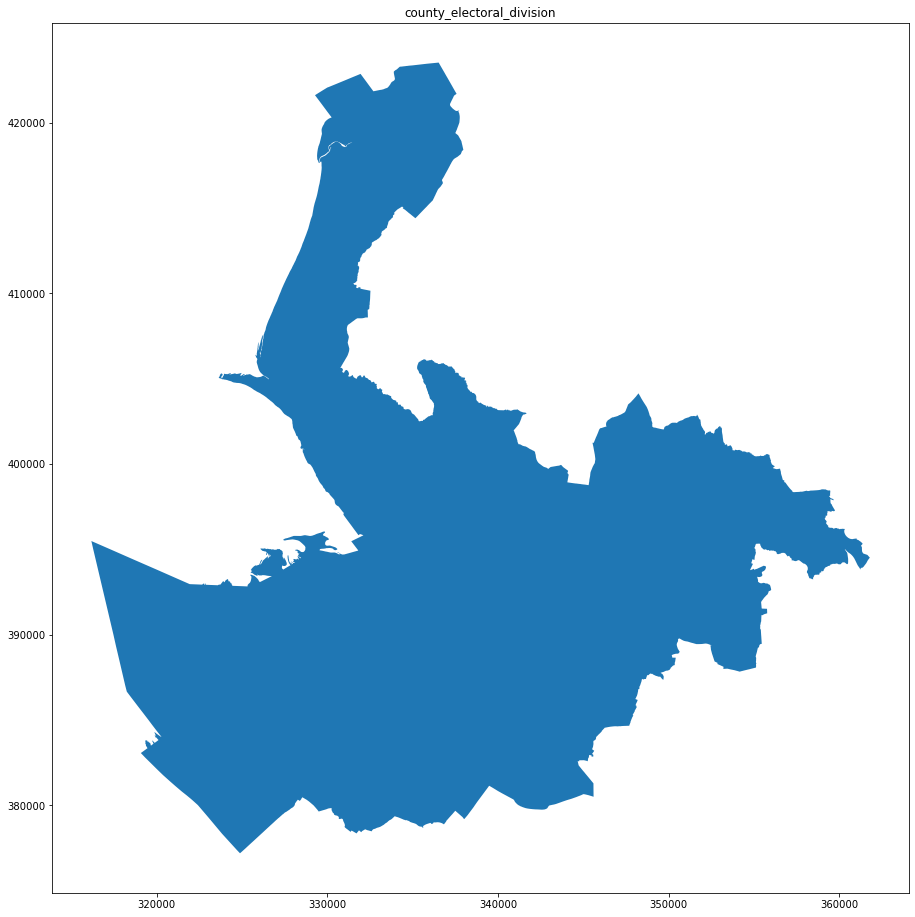

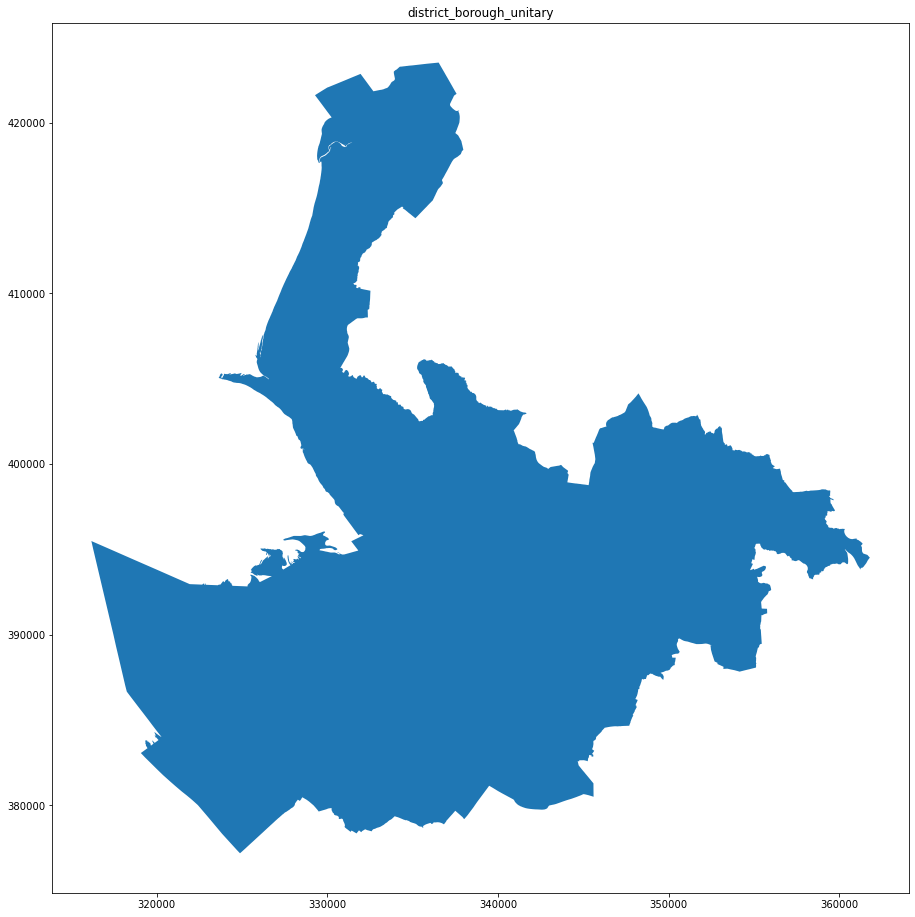

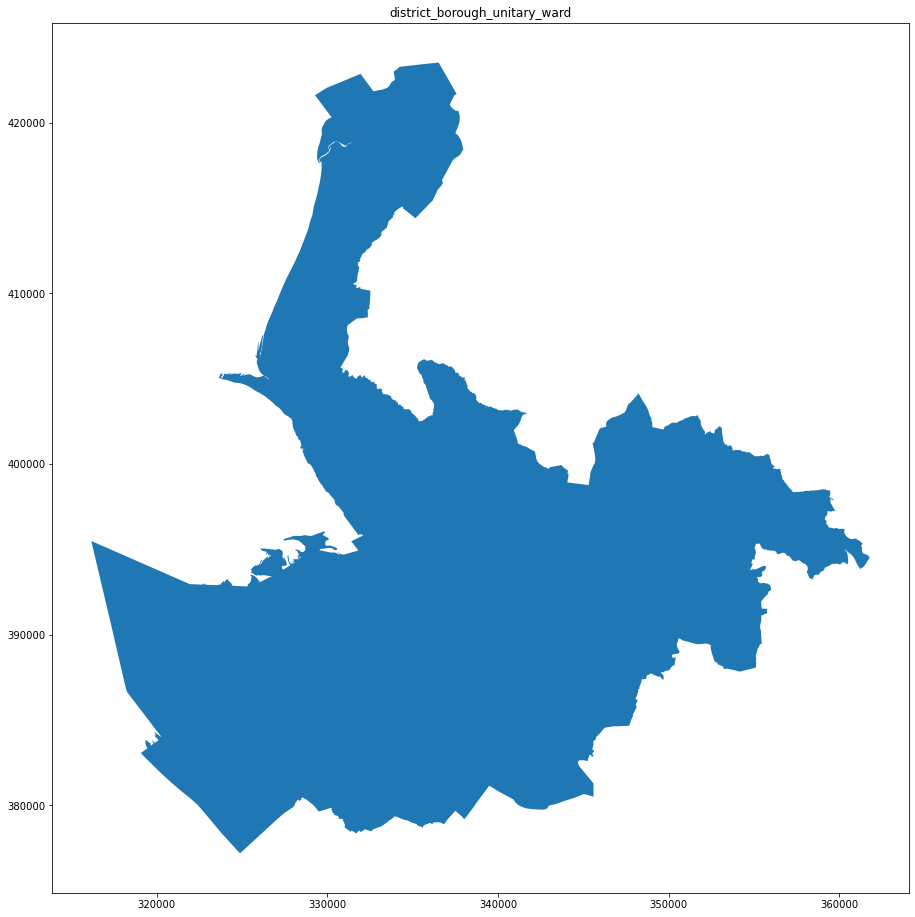

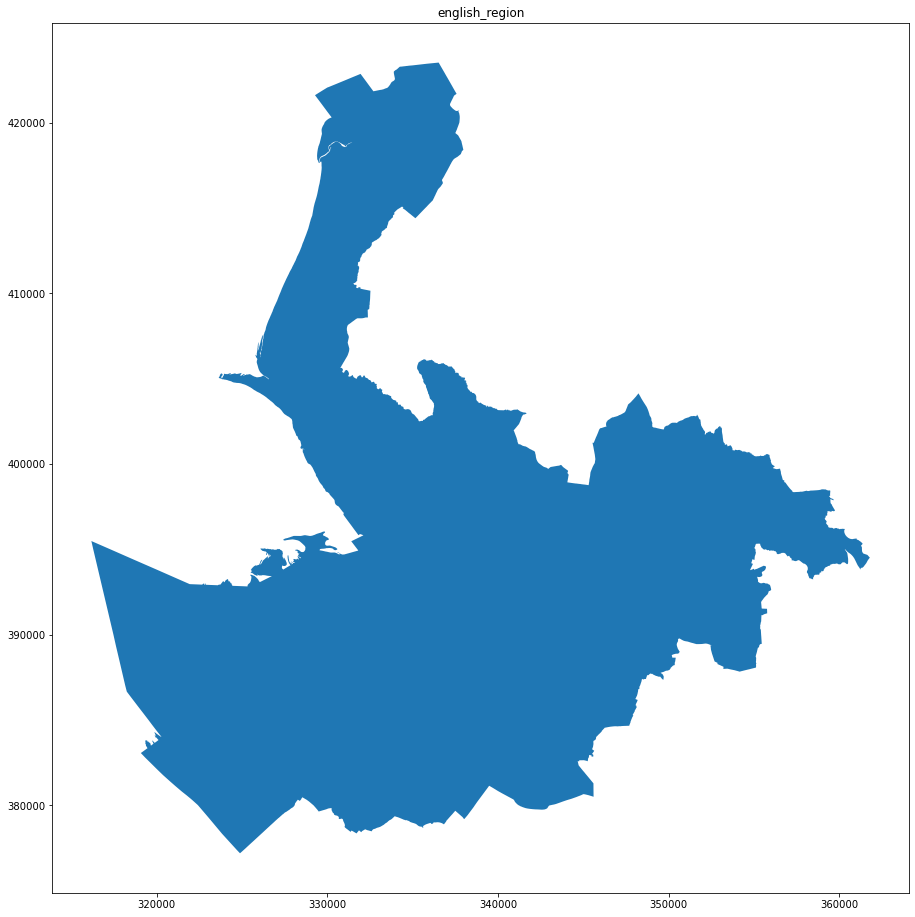

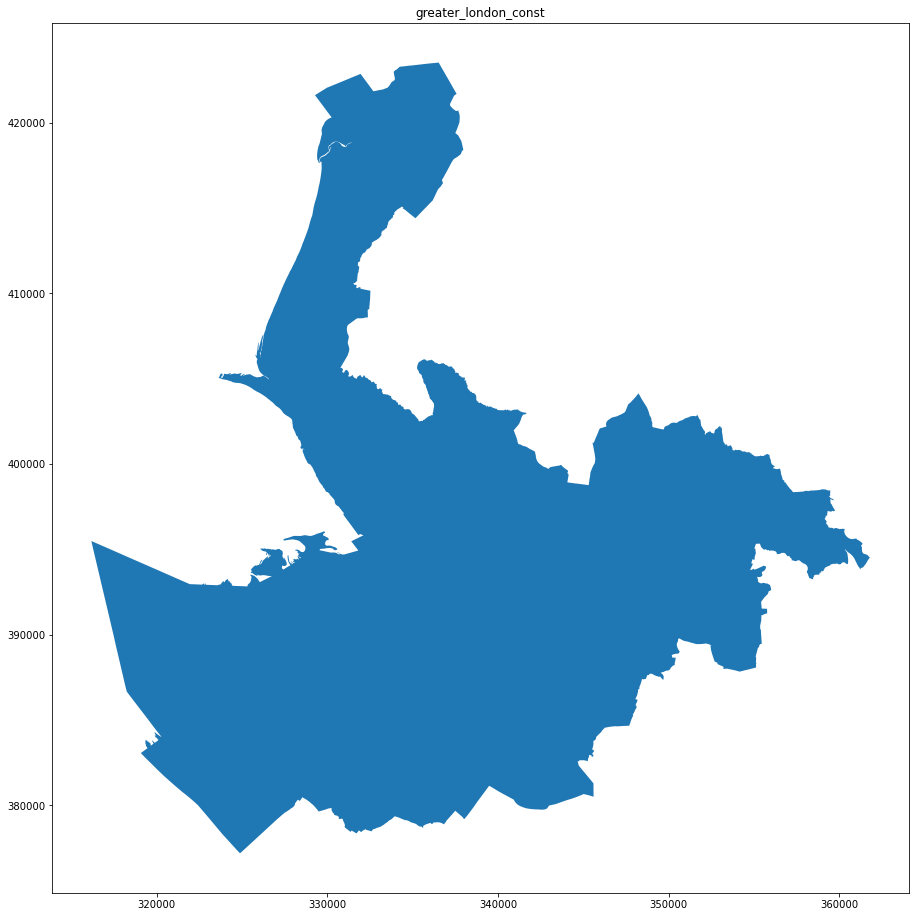

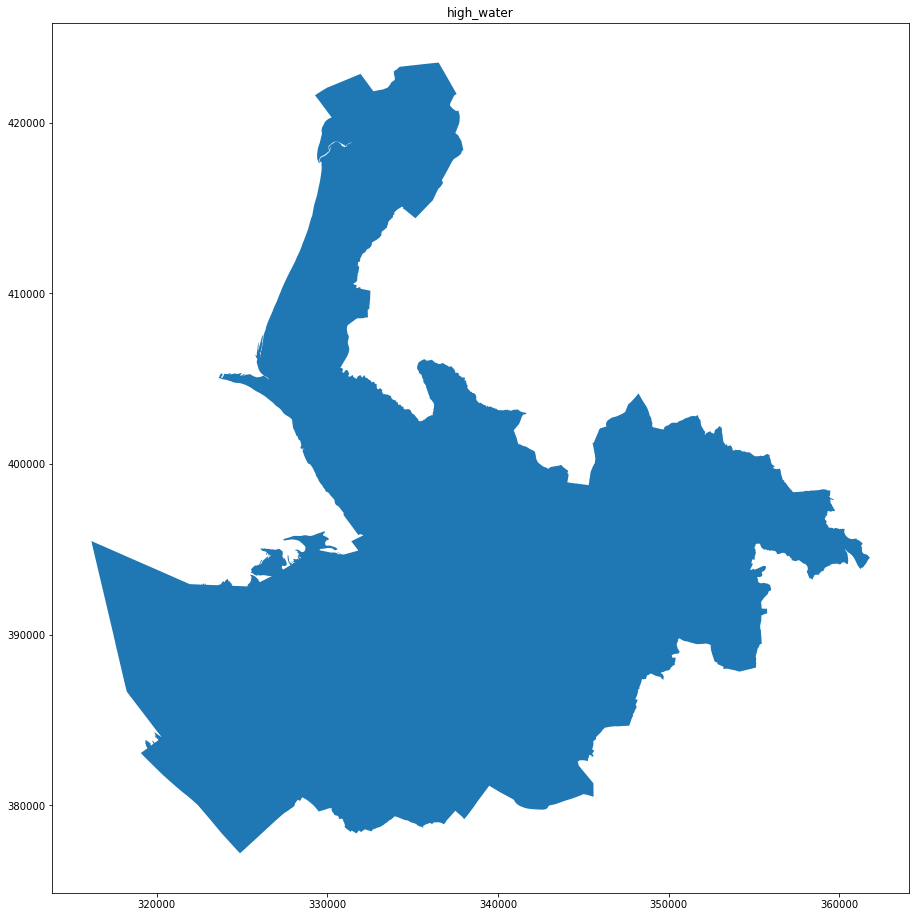

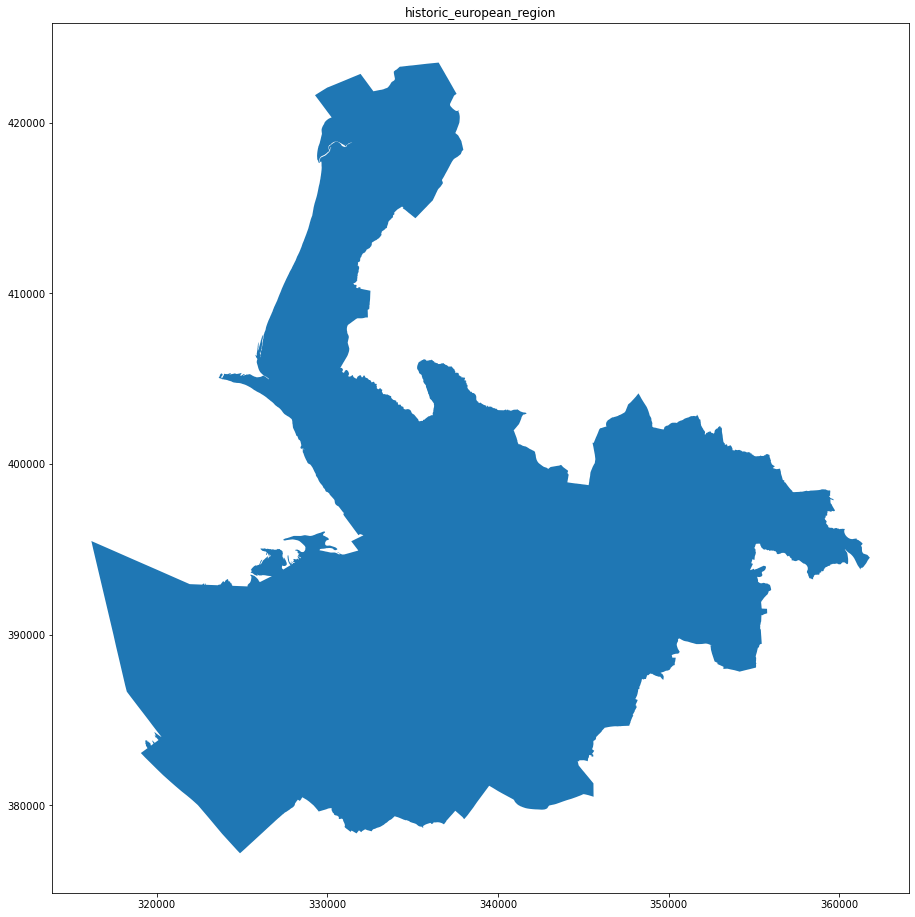

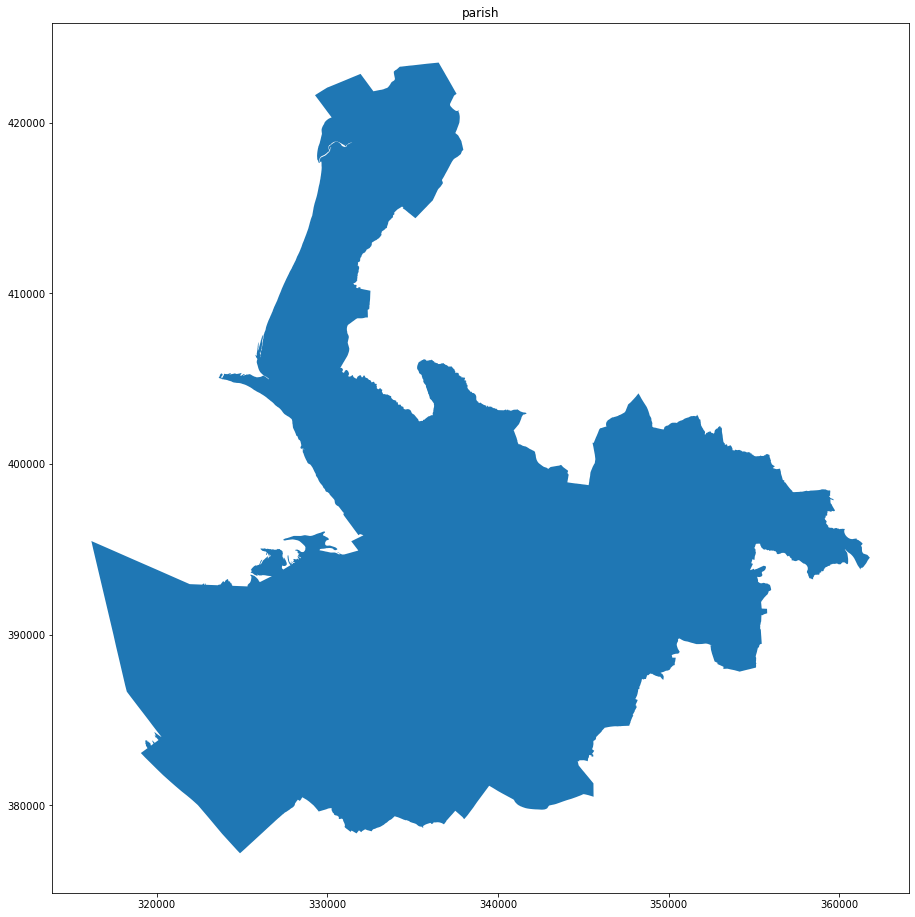

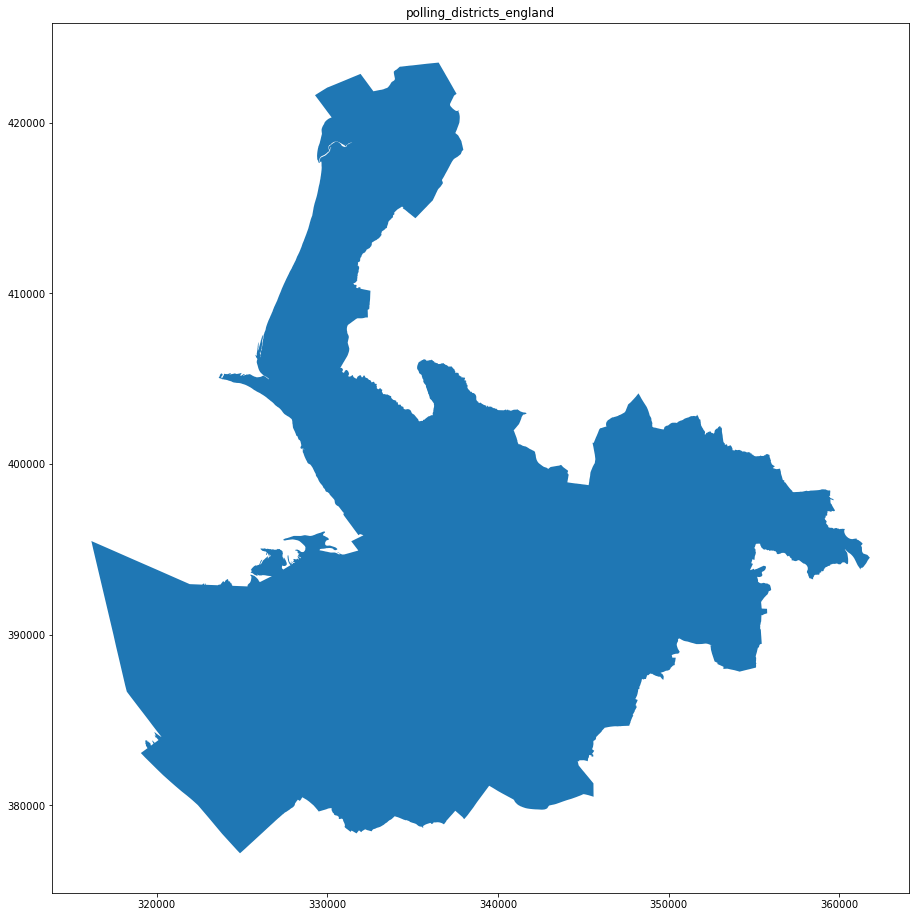

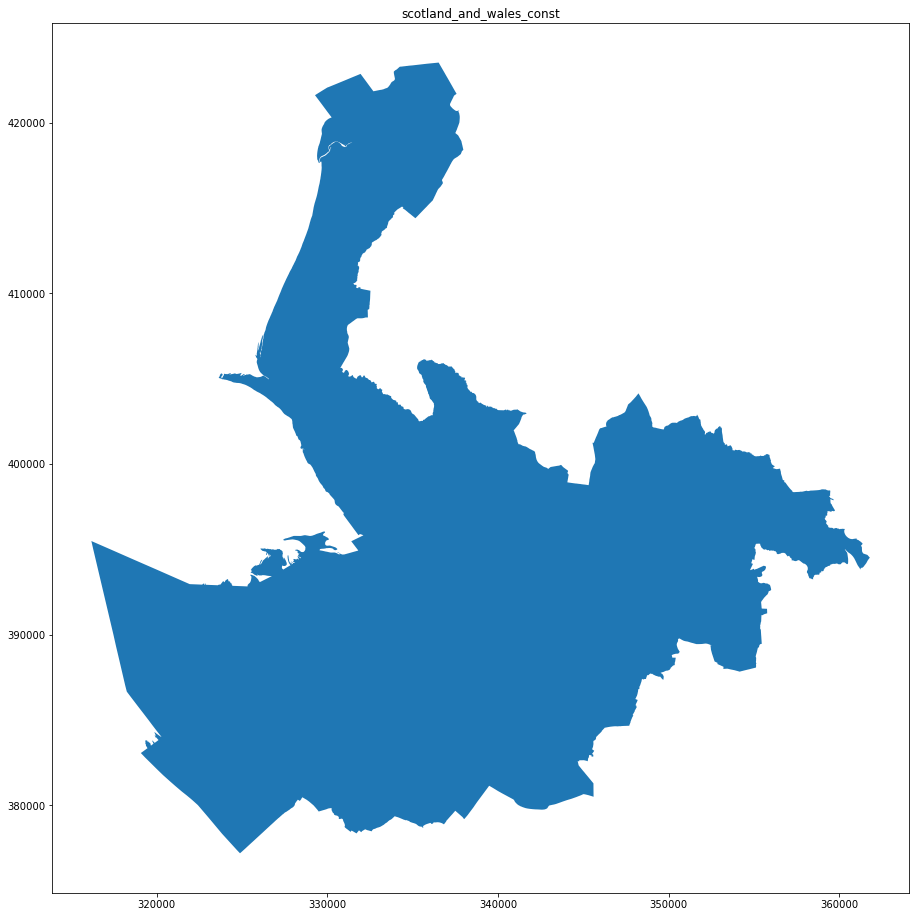

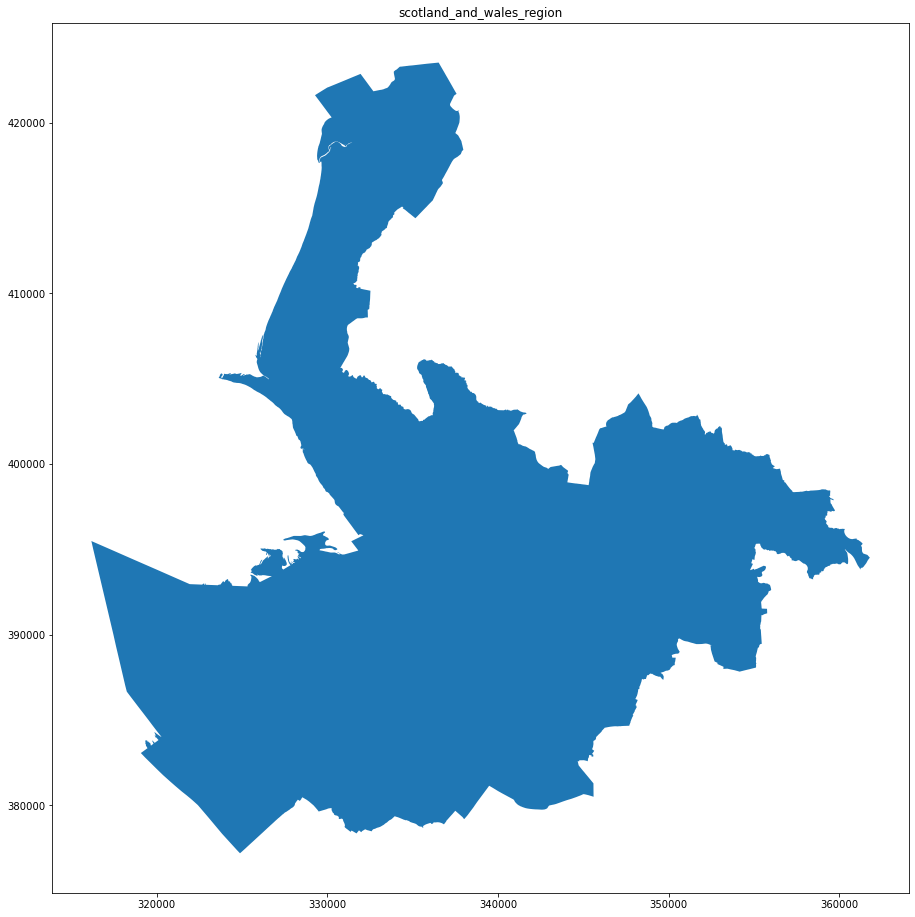

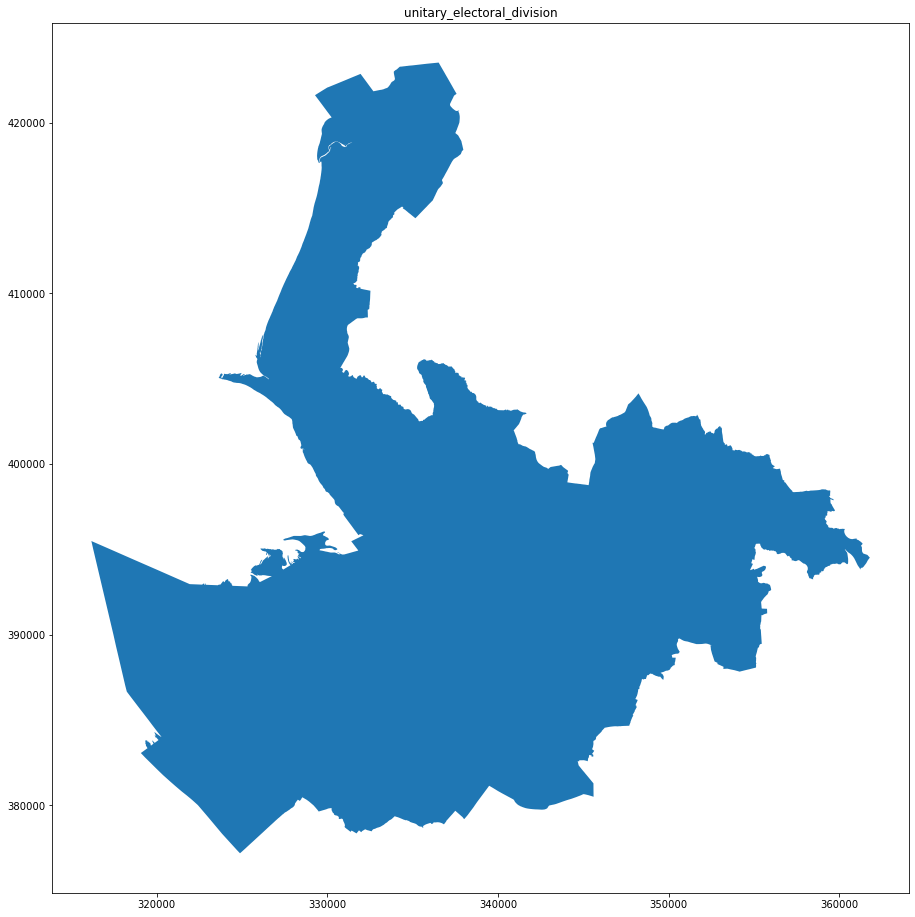

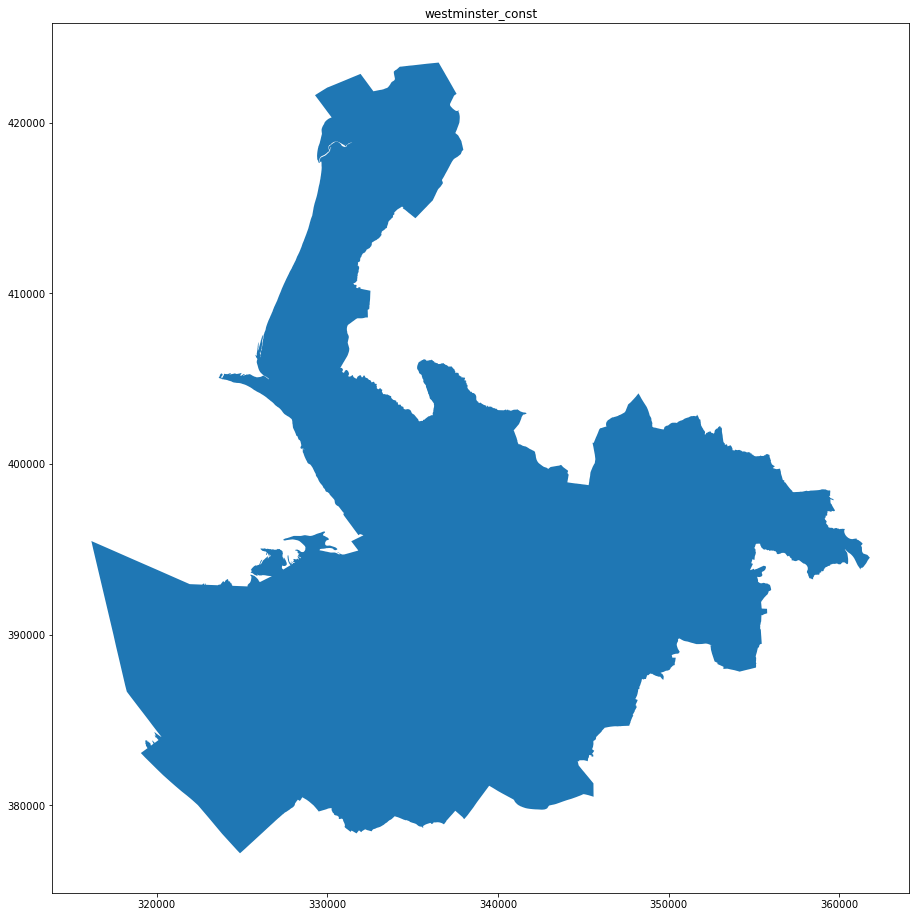

In [23]:
for table in tables[1:]:
    fig, ax = plt.subplots(figsize=(16,16))
    ax.set_title(table)
    pgselect(table).plot(ax=ax)

In [9]:
roads = pgselect('openroads')

<AxesSubplot:>

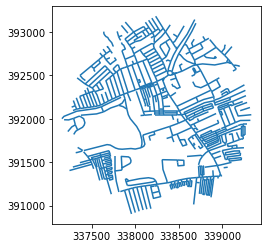

In [10]:
roads.plot()